<a href="https://www.kaggle.com/code/sujithcharan/women-safety?scriptVersionId=194160247" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv
/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv


In [2]:
data = pd.read_csv("/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv")
# data
warnings.filterwarnings('ignore')
data.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

In [3]:
data

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [4]:
data.isnull().sum()

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64

**UNSAFE for working independent women**


In [5]:
state_grouped = data.groupby('State')['Rape'].sum().reset_index()
top_10_states = state_grouped.nlargest(10, 'Rape')
rape = pd.DataFrame(top_10_states)
print(rape)

             State   Rape
42  Madhya Pradesh  43552
56       Rajasthan  31850
66   Uttar Pradesh  30641
37  MADHYA PRADESH  29256
43     Maharashtra  24806
7            Assam  19428
34          Kerala  18888
54          Punjab  18762
68     WEST BENGAL  16378
50          Odisha  15950


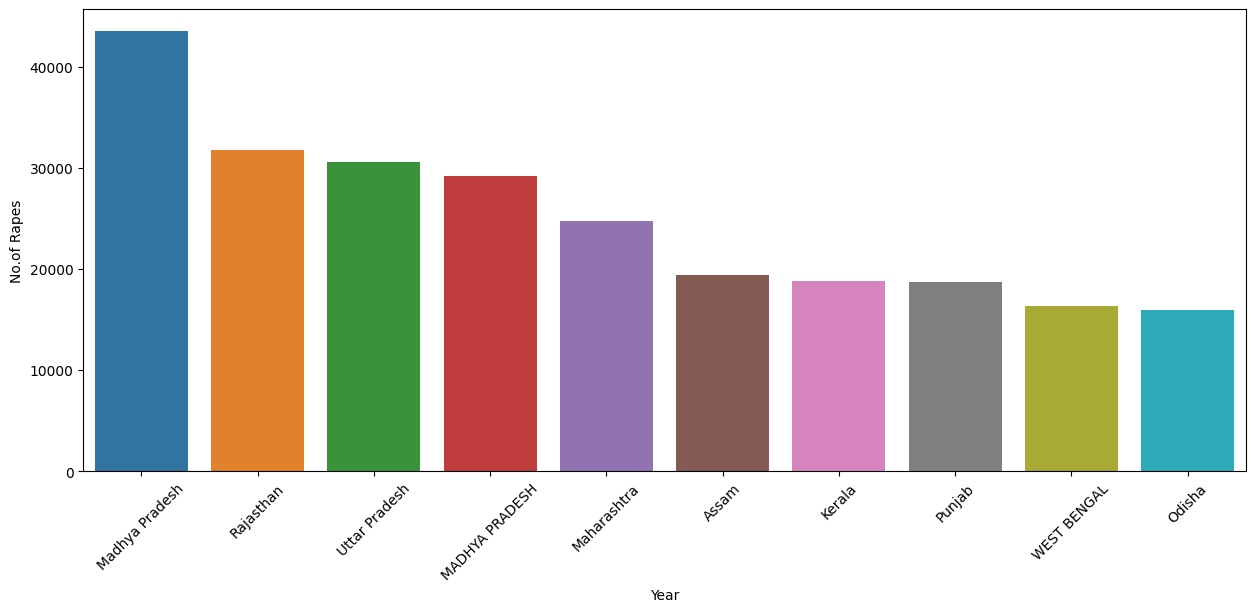

In [6]:
plt.figure(figsize = (15,6))
sns.barplot(x = rape["State"], y =rape["Rape"])
plt.xlabel('Year')
plt.ylabel('No.of Rapes')
plt.xticks(rotation=45)
plt.show()

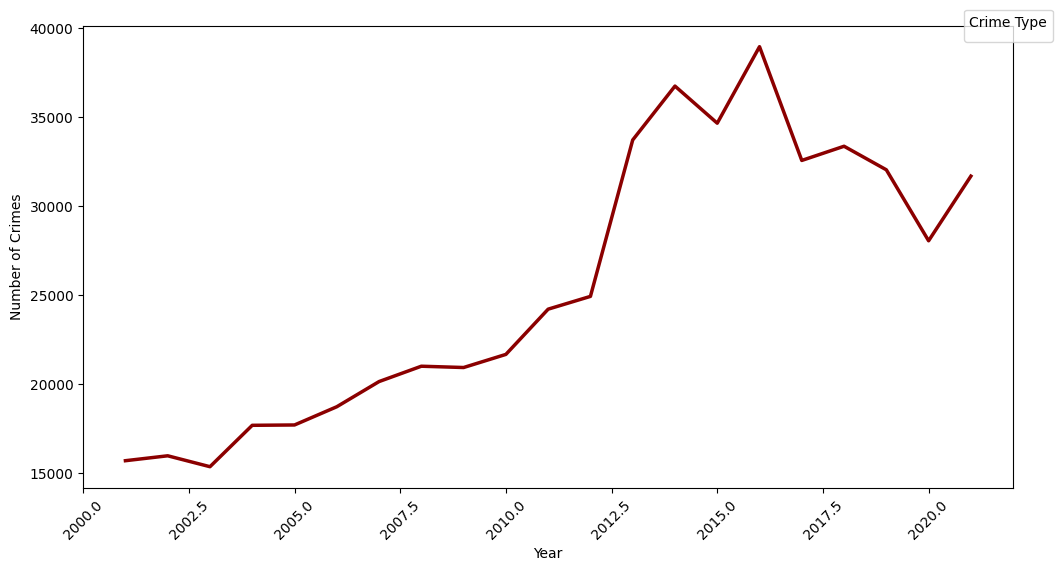

In [7]:
rape_trend = data.groupby("Year")["Rape"].sum().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "Year", y = "Rape",data = rape_trend,color="darkred",linewidth = 2.5,dashes = False)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1.05))
plt.show()

***MINORS SAFETY***


In [8]:
AoM_Trend = data.groupby("State")["AoM"].sum().reset_index()
top_10_AMT = AoM_Trend.nlargest(10,"AoM")
top_10_AMT

,State,AoM
2,ANDHRA PRADESH,28759
64,UTTAR PRADESH,26500
5,Andhra Pradesh,25925
43,Maharashtra,20948
66,Uttar Pradesh,20024
42,Madhya Pradesh,13850
38,MAHARASHTRA,9745
59,TAMIL NADU,9197
37,MADHYA PRADESH,7781
23,HARYANA,7264


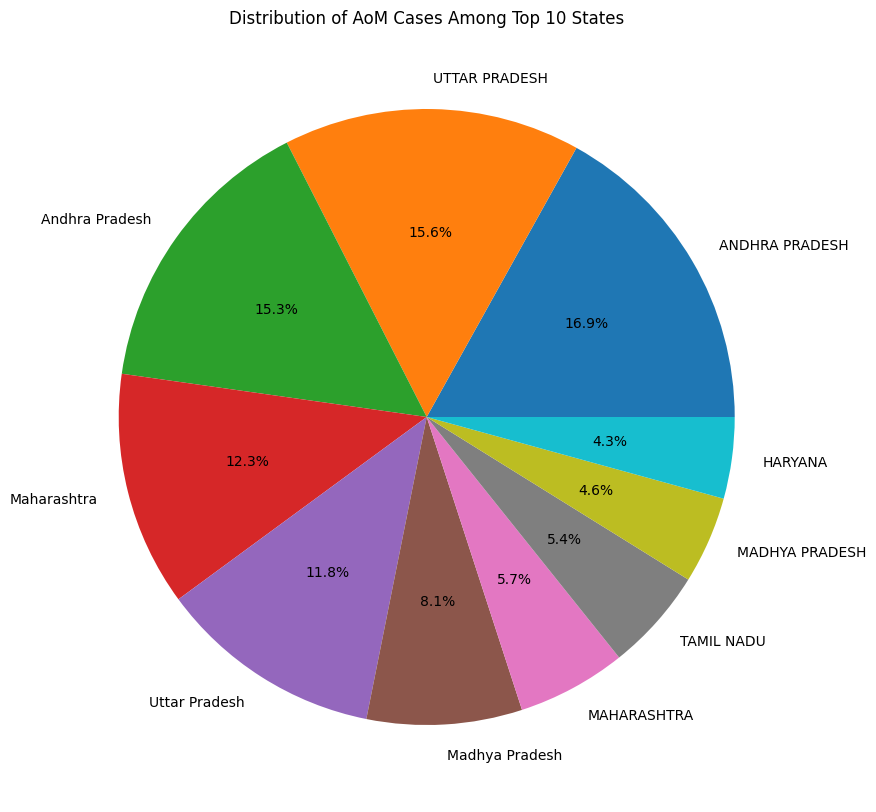

In [9]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_AMT['AoM'], labels=top_10_AMT['State'], autopct='%1.1f%%')
plt.title('Distribution of AoM Cases Among Top 10 States')
plt.show()

In [10]:
crime_trend = data.groupby("State").sum().reset_index


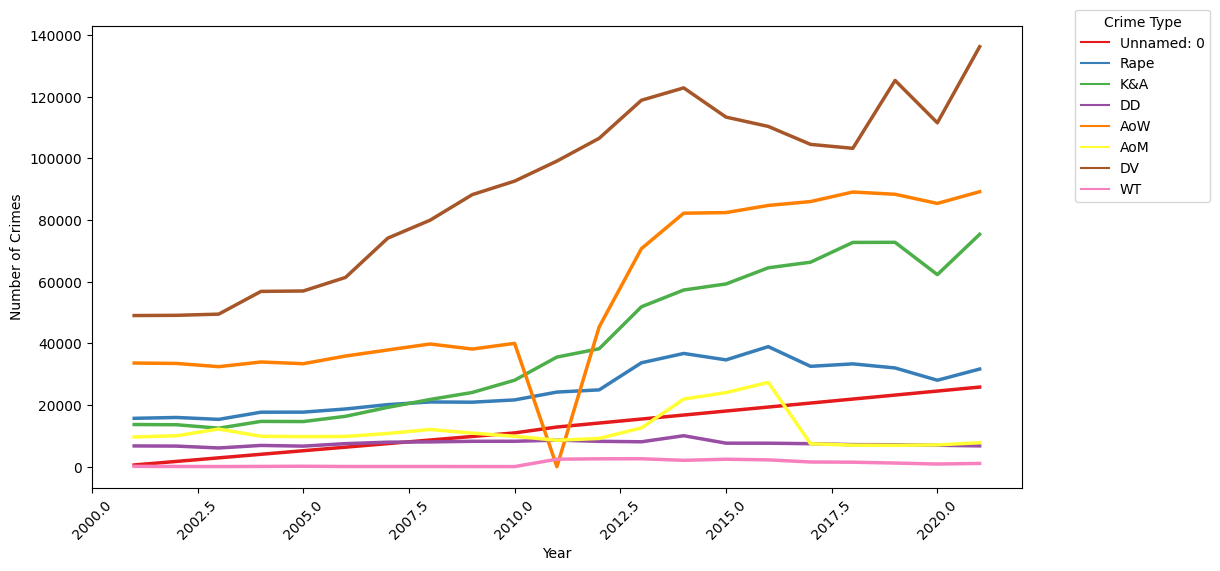

In [11]:
crime_trend = data.groupby("Year").sum()
plt.figure(figsize = (12,6))
sns.lineplot(data=crime_trend, linewidth=2.5, palette="Set1", dashes=False)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1.05))
plt.show()